In [1]:
from preclustering import PreClustering
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors

X,df = PreClustering.main()

loading dataset...
...dataset loaded
starting preprocessing...
...preprocessing completed
starting vectorizing words...
...words vectorized
loading dataset...
...dataset loaded
starting preprocessing...
...preprocessing completed
starting vectorizing words...
...words vectorized


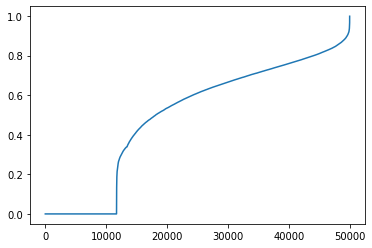

In [4]:
neigh = NearestNeighbors(n_neighbors=100).fit(X)
distances, indices = neigh.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

0.8397607923847815


<Figure size 360x360 with 0 Axes>

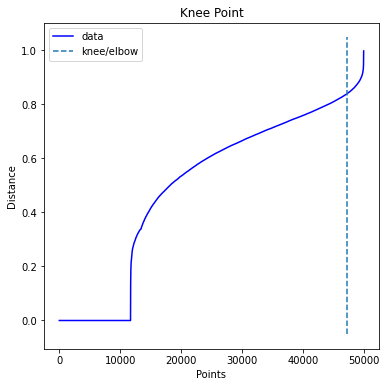

In [5]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [7]:
min_sample_list=np.arange(start=100, stop=900, step=100)
silhouette_scores_data=pd.DataFrame()
for min_sample_trial in min_sample_list:
    db = DBSCAN(eps=0.83, min_samples=min_sample_trial)
    if len(np.unique(db.fit_predict(X))):
        sil_score=silhouette_score(X, db.fit_predict(X))
    else:
        continue
    trial_parameters=" min_sample :" + str(min_sample_trial)
    silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

/tmp/ipykernel_13436/3534939952.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
/tmp/ipykernel_13436/3534939952.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
/tmp/ipykernel_13436/3534939952.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
/tmp/ipykernel_13436/3534939952.py:10: FutureWarning: The frame.app

,score,parameters
0,-0.188376,min_sample :400


In [8]:
DBS_clf = DBSCAN(eps=0.83, min_samples=400)
DBS_clf.fit(X)
print(DBS_clf.labels_)

[-1 -1 -1 ... -1 -1 -1]


In [9]:
labels=DBS_clf.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(DBS_clf.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 9
Estimated no. of noise points: 38253


In [10]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, labels)
sil_score

-0.18837633864595527

In [11]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X.toarray(), labels)

2.8661640449623382